# Bibliotecas

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Binarizer, MaxAbsScaler, PowerTransformer, Normalizer, Binarizer, QuantileTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from skopt import gp_minimize, dummy_minimize
from skopt.plots import plot_convergence
from matplotlib.pyplot import figure
from PIL import Image
from IPython.display import display, Image
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from matplotlib.pyplot import figure
from sklearn import metrics

# Carregamento dos Dados

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [2]:
warnings.filterwarnings("ignore")

dados = pd.read_csv("data.csv")
dados.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


# Tratamento dos Dados

In [3]:
dados.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [4]:
novos_dados = dados.copy()
del novos_dados["Unnamed: 32"]
del novos_dados["id"]
novos_dados

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
numerico = {"B": 0, "M": 1}
novos_dados.diagnosis.replace(numerico, inplace = True)
novos_dados.head(10)
colunas = list(novos_dados.columns)

In [6]:
novos_dados.diagnosis[novos_dados.diagnosis == 0]

19     0
20     0
21     0
37     0
46     0
      ..
558    0
559    0
560    0
561    0
568    0
Name: diagnosis, Length: 357, dtype: int64

# Escala

In [7]:
novos_dados = pd.DataFrame(scale(novos_dados), columns = colunas)
novos_dados.diagnosis[novos_dados.diagnosis > 0] = 1
novos_dados.diagnosis[novos_dados.diagnosis < 0] = 0
novos_dados

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.0,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.0,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.0,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.0,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.0,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1.0,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.0,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


# Divisão e Balanceamento dos Dados

In [8]:
nomes = list(novos_dados.columns)
Nomes = nomes.copy()
Nomes.remove("diagnosis")

X = novos_dados[Nomes].values
Y = novos_dados.diagnosis

X_A, X_val_A, Y, Y_val_A = train_test_split(X, Y, test_size = 0.1, random_state = 7)

under_random = RandomUnderSampler(random_state = 7)
X_A, Y = under_random.fit_resample(X_A, Y)

escala_minmax = MinMaxScaler().fit(X_A)
X_B = escala_minmax.transform(X_A)

escala_padronizada = StandardScaler().fit(X_A)
X_C = escala_padronizada.transform(X_A)

escala_robust = RobustScaler().fit(X_A)
X_D = escala_robust.transform(X_A)

escala_maxabs = MaxAbsScaler().fit(X_A)
X_E = escala_maxabs.transform(X_A)

escala_normalizer = Normalizer().fit(X_A)
X_F = escala_normalizer.transform(X_A)

escala_quantile = QuantileTransformer(random_state = 7).fit(X_A)
X_G = escala_quantile.transform(X_A)

Y = Y.values

# Cross-Validation

In [9]:
def cross_val(score_k, cv, Knn):
    escala = {"Original": [None, X_A],
              "MinMaxScaler": [preprocessing.MinMaxScaler(feature_range = (0, 1)), X_B],
              "StandardScaler": [preprocessing.StandardScaler(), X_C],
              "RobustScaler": [preprocessing.RobustScaler(), X_D],
              "MaxAbsScaler": [preprocessing.MaxAbsScaler(), X_E],
              "Normalizer": [preprocessing.Normalizer(), X_F],
              "QuantileTransformer": [preprocessing.QuantileTransformer(), X_G]}
    
    metricas = {"acc": "accuracy",
                "rec": "recall",
                "prec": "precision"}
    
    C = len(Nomes)
    c = 0
    resultados = []
    for esc in escala:
        for K in [C, C - 1, C - 2, C - 3, C - 4, C - 5, C - 6, C - 7, C - 8, C - 9, C - 10,
                  C - 11, C - 12, C - 13, C - 14, C - 15, C - 16, C - 17, C - 18, C - 19, C - 20,
                  C - 21, C - 22, C - 23, C - 24, C - 25, C - 26, C - 27]:
            for knn in Knn:
                modelo = KNeighborsClassifier(n_neighbors = knn)

                kbest = SelectKBest(score_k, k = K).fit(escala[esc][1], Y)
                colunas = kbest.get_support(indices = True)
                cross = cross_validate(make_pipeline(escala[esc][0], modelo), X_A[:,colunas], Y, cv = cv.n_splits, scoring = metricas)

                resultados.append((str(modelo), knn, esc, K, (sum(cross["test_acc"]) / cv.n_splits),
                                   (sum(cross["test_rec"]) / cv.n_splits), (sum(cross["test_prec"]) / cv.n_splits)))
                if c % 58 == 0:
                    print(resultados[c])
                c +=1

    return pd.DataFrame(resultados, columns = ["Modelos", "Vizinhos Proximos", "Escala dos Dados", "Variáveis Utilizadas",
                                               "Acurácia Média", "Recall Médio", "Precisão Média"]).sort_values("Acurácia Média", ascending = False)

#results0 = cross_val(f_classif, StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7), Knn = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25])
#results0.to_csv("breast_cross0.csv", index = False)
results0 = pd.read_csv("breast_cross0.csv")
results0.head(56)

,Modelos,Vizinhos Proximos,Escala dos Dados,Variáveis Utilizadas,Acurácia Média,Recall Médio,Precisão Média
0,KNeighborsClassifier(n_neighbors=9),9,QuantileTransformer,22,0.968211,0.957610,0.979487
1,KNeighborsClassifier(n_neighbors=7),7,QuantileTransformer,26,0.968211,0.962873,0.973932
2,KNeighborsClassifier(n_neighbors=9),9,QuantileTransformer,23,0.968211,0.957610,0.979487
3,KNeighborsClassifier(n_neighbors=15),15,QuantileTransformer,27,0.968211,0.957610,0.979487
4,KNeighborsClassifier(n_neighbors=13),13,QuantileTransformer,28,0.968211,0.962873,0.973773
5,KNeighborsClassifier(n_neighbors=15),15,QuantileTransformer,28,0.968211,0.962873,0.973773
6,KNeighborsClassifier(n_neighbors=13),13,QuantileTransformer,27,0.968211,0.957610,0.979487
7,KNeighborsClassifier(n_neighbors=7),7,QuantileTransformer,25,0.968211,0.962873,0.974359
8,KNeighborsClassifier(n_neighbors=13),13,Normalizer,26,0.968175,0.962873,0.974359
9,KNeighborsClassifier(),5,RobustScaler,16,0.965649,0.947084,0.983784


In [10]:
#results1 = cross_val(mutual_info_classif, StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7), Knn = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25])
#results1.to_csv("breast_cross1.csv", index = False)
results1 = pd.read_csv("breast_cross1.csv")
results1.head(56)

,Modelos,Vizinhos Proximos,Escala dos Dados,Variáveis Utilizadas,Acurácia Média,Recall Médio,Precisão Média
0,KNeighborsClassifier(n_neighbors=3),3,QuantileTransformer,27,0.973509,0.968137,0.979082
1,KNeighborsClassifier(n_neighbors=3),3,QuantileTransformer,28,0.970877,0.962873,0.979082
2,KNeighborsClassifier(n_neighbors=17),17,QuantileTransformer,22,0.970842,0.968137,0.974359
3,KNeighborsClassifier(n_neighbors=13),13,QuantileTransformer,22,0.968211,0.962873,0.974359
4,KNeighborsClassifier(n_neighbors=13),13,QuantileTransformer,28,0.968211,0.962873,0.973932
5,KNeighborsClassifier(n_neighbors=7),7,QuantileTransformer,26,0.968211,0.962873,0.973932
6,KNeighborsClassifier(n_neighbors=15),15,QuantileTransformer,28,0.968211,0.962873,0.973932
7,KNeighborsClassifier(n_neighbors=9),9,QuantileTransformer,22,0.968211,0.957610,0.979487
8,KNeighborsClassifier(n_neighbors=15),15,Normalizer,27,0.968175,0.962873,0.974359
9,KNeighborsClassifier(n_neighbors=13),13,Normalizer,26,0.968175,0.962873,0.974359


In [11]:
def cross_variaveis(r, score_k):
    R = r[(r["Acurácia Média"] + r["Recall Médio"]) == (r["Acurácia Média"] + r["Recall Médio"]).max()].values[0]
    
    escala = {"Original": [None, X_A],
              "MinMaxScaler": [preprocessing.MinMaxScaler(feature_range = (0, 1)), X_B],
              "StandardScaler": [preprocessing.StandardScaler(), X_C],
              "RobustScaler": [preprocessing.RobustScaler(), X_D],
              "MaxAbsScaler": [preprocessing.MaxAbsScaler(), X_E],
              "Normalizer": [preprocessing.Normalizer(), X_F],
              "QuantileTransformer": [preprocessing.QuantileTransformer(), X_G]}
    
    kb = SelectKBest(score_k, k = R[3]).fit(escala[R[2]][1], Y)
    colunas = kb.get_support(indices = True)
    kb = pd.DataFrame(escala[R[2]][1]).iloc[:,colunas]
    
    print("---Quantidade de Variáveis Mais Importantes: ", R[3])
    print("---Escala dos Dados: ", R[2])
    print("---Variáveis Utilizadas:")
    for i in colunas:
        print(Nomes[i])
    print("---Modelo Utilizado:")
    print(R[0])
        
    return kb, colunas

X, colunas = cross_variaveis(results1, mutual_info_classif)
X.dtypes
X.head(7)

---Quantidade de Variáveis Mais Importantes:  27
---Escala dos Dados:  QuantileTransformer
---Variáveis Utilizadas:
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
radius_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
---Modelo Utilizado:
KNeighborsClassifier(n_neighbors=3)


,0,1,2,3,4,5,6,7,8,10,...,20,21,22,23,24,25,26,27,28,29
0,0.257294,0.973475,0.251989,0.265252,0.261273,0.180371,0.127321,0.253316,0.564987,0.790451,...,0.291777,0.877984,0.278515,0.297082,0.095491,0.098143,0.092838,0.140584,0.151194,0.111406
1,0.339523,0.236074,0.315650,0.334218,0.553050,0.103448,0.262599,0.344828,0.171088,0.225464,...,0.274536,0.148541,0.241379,0.278515,0.429708,0.034483,0.169761,0.156499,0.143236,0.061008
2,0.250663,0.376658,0.233422,0.246684,0.132626,0.071618,0.100796,0.090186,0.586207,0.196286,...,0.228117,0.228117,0.196286,0.238727,0.210875,0.079576,0.159151,0.184350,0.400531,0.283820
3,0.208223,0.387268,0.198939,0.212202,0.201592,0.164456,0.236074,0.135279,0.095491,0.076923,...,0.188329,0.344828,0.183024,0.193634,0.503979,0.326260,0.339523,0.305040,0.737401,0.429708
4,0.535809,0.007958,0.538462,0.525199,0.822281,0.541114,0.517241,0.570292,0.570292,0.363395,...,0.466844,0.018568,0.460212,0.461538,0.469496,0.307692,0.452255,0.496021,0.498674,0.466844
5,0.098143,0.143236,0.088859,0.100796,0.273210,0.047745,0.000000,0.000000,0.671088,0.453581,...,0.091512,0.114058,0.084881,0.095491,0.124668,0.029178,0.000000,0.000000,0.344828,0.034483
6,0.580902,0.267905,0.557029,0.575597,0.302387,0.251989,0.233422,0.358090,0.143236,0.387268,...,0.514589,0.185676,0.453581,0.485411,0.299735,0.225464,0.206897,0.270557,0.228117,0.151194


In [12]:
def previsao(r, g1 = X_val_A, g2 = Y_val_A, c = colunas):
    R = r[(r["Acurácia Média"] + r["Recall Médio"]) == (r["Acurácia Média"] + r["Recall Médio"]).max()].values[0]
    
    if R[2] == "MinMaxScaler":
        X_ = escala_minmax.transform(g1)
    
    elif R[2] == "Original":
        X_ = g1
    
    elif R[2] == "StandardScaler":
        X_ = escala_padronizada.transform(g1)
    
    elif R[2] == "RobustScaler":
        X_ = escala_robust.transform(g1)
    
    elif R[2] == "Normalizer":
        X_ = escala_normalizer.transform(g1)
    
    elif R[2] == "MaxAbsScaler":
        X_ = escala_maxabs.transform(g1)
    
    else:
        X_ = escala_quantile.transform(g1)
    
    return pd.DataFrame(X_).iloc[:,c], g2

X_val0, Y_val = previsao(results1, X_val_A, Y_val_A, colunas)
val = X_val0.head(7)
X_val0 = X_val0.values
val

,0,1,2,3,4,5,6,7,8,10,...,20,21,22,23,24,25,26,27,28,29
0,0.216622,0.274978,0.194341,0.221305,0.048141,0.019599,0.054512,0.073158,0.289714,0.500853,...,0.250853,0.147480,0.195292,0.251743,0.050106,0.026770,0.055149,0.094439,0.353669,0.150604
1,0.647938,0.996853,0.661804,0.642036,0.742706,0.837975,0.818217,0.727880,0.831754,0.237511,...,0.649573,1.000000,0.669761,0.647878,0.989943,0.930544,0.876314,0.833132,0.845822,0.947392
2,0.246684,0.668435,0.245407,0.247569,0.527153,0.317418,0.227174,0.171916,0.301061,0.408709,...,0.300872,0.486295,0.285525,0.314246,0.740053,0.491922,0.270027,0.237161,0.164898,0.606366
3,0.070292,0.115953,0.069260,0.066748,0.862069,0.339174,0.062653,0.082913,0.995625,0.696481,...,0.074271,0.056440,0.059807,0.072956,0.389920,0.103448,0.044046,0.042626,0.855217,0.473033
4,0.244032,0.305703,0.237010,0.245288,0.959623,0.263753,0.395447,0.668563,0.773652,0.815831,...,0.159151,0.103448,0.139541,0.160256,0.526525,0.066777,0.118739,0.352632,0.066976,0.019019
5,0.795756,0.405836,0.798703,0.796980,0.885563,0.770115,0.819115,0.885279,0.832133,0.899425,...,0.745599,0.348364,0.732095,0.756189,0.399646,0.464987,0.462905,0.518929,0.597480,0.460781
6,0.443729,0.067829,0.462865,0.435411,0.728117,0.613793,0.465888,0.473917,0.727927,0.280504,...,0.403183,0.046029,0.438727,0.403309,0.551724,0.559682,0.454833,0.358840,0.635279,0.513705


# Otimização

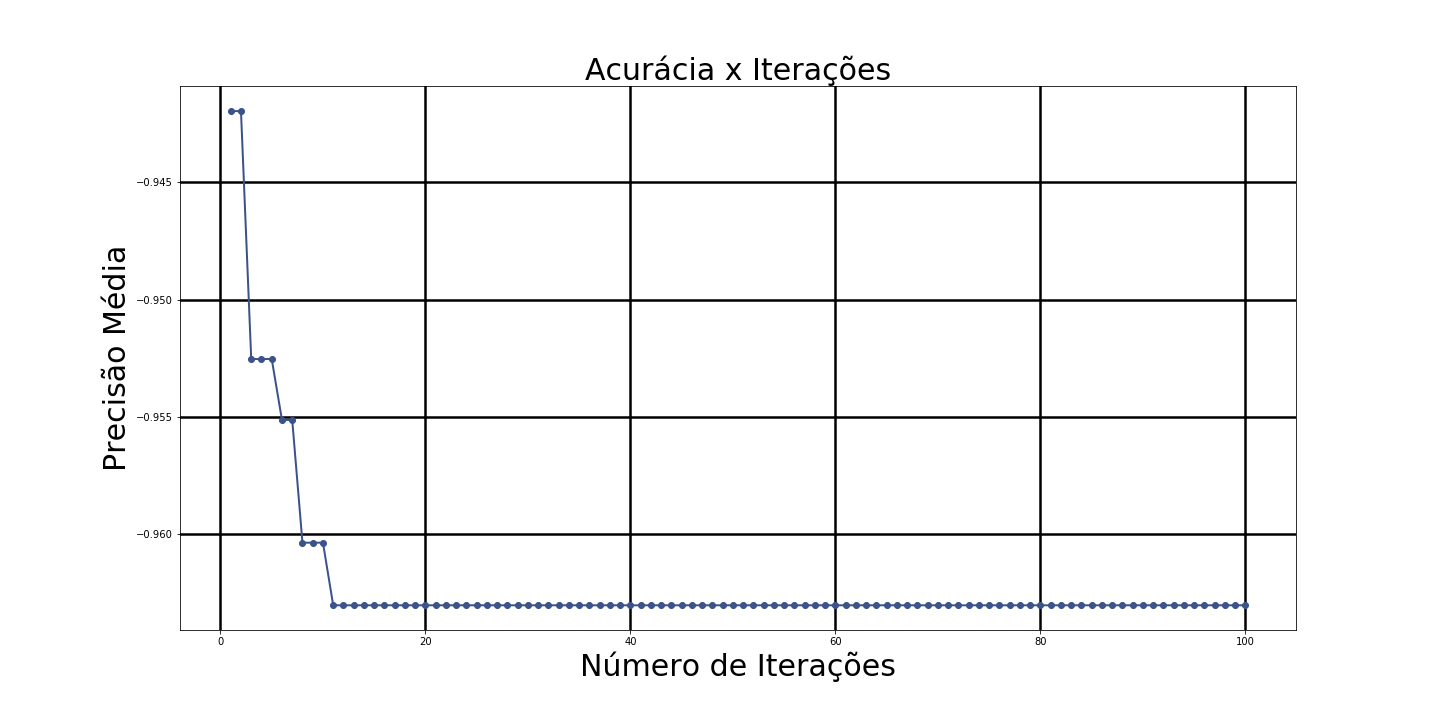

In [13]:
def minimizar_knn(params, r = results1):
    n_neighbors = params[0]
    weights = params[1]
    algorithm = params[2]
    leaf_size = params[3]
    p = params[4]

    #print(params)
    
    modelo = KNeighborsClassifier(n_neighbors = n_neighbors,
                                  weights = weights,
                                  algorithm = algorithm,
                                  leaf_size = leaf_size,
                                  p = p)
    
    R = r[(r["Acurácia Média"] + r["Recall Médio"]) == (r["Acurácia Média"] + r["Recall Médio"]).max()].values[0]
    
    escala = {"Original": None,
              "MinMaxScaler": preprocessing.MinMaxScaler(feature_range = (0, 1)),
              "StandardScaler": preprocessing.StandardScaler(),
              "RobustScaler": preprocessing.RobustScaler(),
              "MaxAbsScaler": preprocessing.MaxAbsScaler(),
              "Normalizer": preprocessing.Normalizer(),
              "QuantileTransformer": preprocessing.QuantileTransformer()}
    
    metricas = {"acc": "accuracy"}
    
    resultados = cross_validate(make_pipeline(escala[R[2]], modelo), X, Y, cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7), scoring = metricas)
    
    return - sum(resultados["test_acc"]) / 5

espaco = [(1, 3, 5, 7, 9, 11),
          ("uniform", "distance"),
          ("auto", "ball_tree", "kd_tree", "brute"),
          (10, 90),
          (1, 30)]

#resultados_otimizacao = gp_minimize(minimizar_knn, espaco, random_state = 7, n_calls = 100, n_random_starts = 10, verbose = False)

def iteracoes(resulta, arq, titulo = "Precisão"):
    figure(figsize = (20,10))
    resulta.func_vals[0] = resulta.func_vals[1]
    plot_convergence(resulta)
    plt.title("%s x Iterações" %(titulo), fontsize = 30)
    plt.xlabel("Número de Iterações", fontsize = 30)
    plt.ylabel("Precisão Média", fontsize = 30)
    plt.grid(color = 'black', linestyle = '-', linewidth = 2.5)
    plt.savefig(arq)
    plt.show()

#iteracoes(resultados_otimizacao, "imagem_breast_knn.png", "Acurácia")
    
display(Image(filename='imagem_breast_knn.png'))

________________________________________________________________MODELO OTIMIZADO APLICADO NOS DADOS DE VALIDAÇÃO:
________________________________________________________________ACURÁCIA:  0.9824561403508771
________________________________________________________________RECALL:  0.9565217391304348
________________________________________________________________PRECISÃO:  1.0
________________________________________________________________F1:  0.9777777777777777
________________________________________________________________SELETIVIDADE:  1.0
________________________________________________________________NPV:  0.9714285714285714


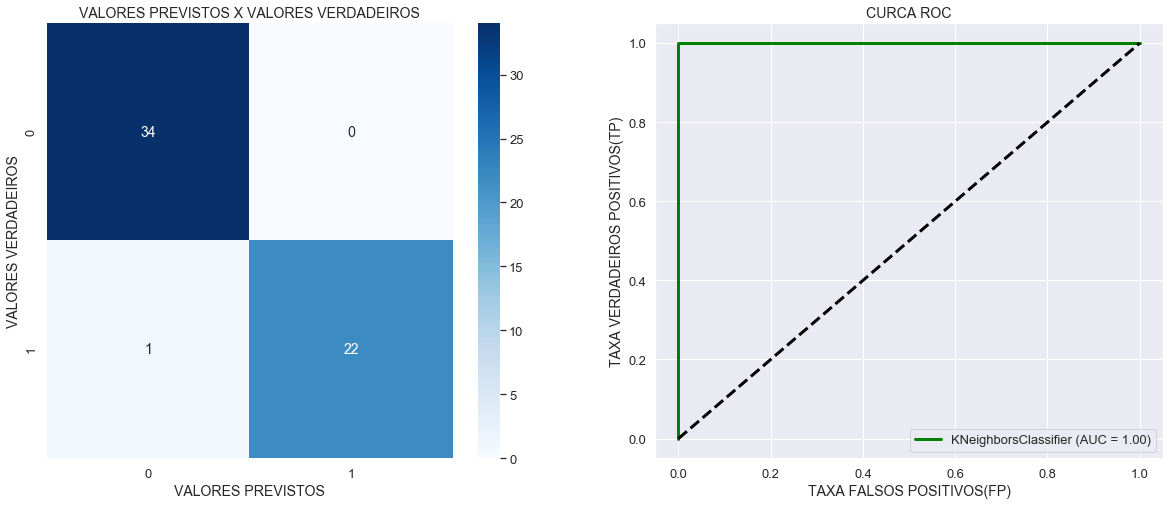

In [14]:
def modelos(modelo, Xtreino, Ytreino, Xteste, Yteste):
    sns.set(font_scale = 1.175)
    modelo.fit(Xtreino, Ytreino)
    
    valores_previstos = modelo.predict(Xteste)
        
    matriz = confusion_matrix(Yteste, valores_previstos)
    tn, fp, fn, tp = matriz.ravel()
    
    metricas = [accuracy_score(Yteste, valores_previstos),
                recall_score(Yteste, valores_previstos),
                precision_score(Yteste, valores_previstos),
                f1_score(Yteste, valores_previstos),
                tn / (tn + fp),
                tn / (tn + fn)]
    
    print("________________________________________________________________ACURÁCIA: ", metricas[0])
    print("________________________________________________________________RECALL: ", metricas[1])
    print("________________________________________________________________PRECISÃO: ", metricas[2])
    print("________________________________________________________________F1: ", metricas[3])
    print("________________________________________________________________SELETIVIDADE: ", metricas[4])
    print("________________________________________________________________NPV: ", metricas[5])
    
    fig, ax = plt.subplots(figsize = (20, 8), nrows = 1, ncols = 2)
    sns.heatmap(matriz, annot = True, cmap = "Blues", fmt = 'g', ax = ax[0])
    ax[0].set_title("VALORES PREVISTOS X VALORES VERDADEIROS")
    ax[0].set_xlabel("VALORES PREVISTOS")
    ax[0].set_ylabel("VALORES VERDADEIROS")
    
    metrics.plot_roc_curve(modelo, Xteste, Yteste, ax = ax[1], lw = 3, color = "green")
    a = sns.lineplot(x = [0,1], y = [0,1], color = "black", lw = 3, ax = ax[1])
    a.lines[1].set_linestyle("--")
    ax[1].set_title("CURCA ROC")
    ax[1].set_xlabel("TAXA FALSOS POSITIVOS(FP)")
    ax[1].set_ylabel("TAXA VERDADEIROS POSITIVOS(TP)")
    
    plt.show()

arquivo = "modelo_breast_knn.sav"
'''
pickle.dump(KNeighborsClassifier(n_neighbors = resultados_otimizacao.x[0],
                                 weights = resultados_otimizacao.x[1],
                                 algorithm = resultados_otimizacao.x[2],
                                 leaf_size = resultados_otimizacao.x[3],
                                 p = resultados_otimizacao.x[4]), open(arquivo, 'wb'))
'''
modelo_otimizado = pickle.load(open(arquivo, 'rb'))
    
print("________________________________________________________________MODELO OTIMIZADO APLICADO NOS DADOS DE VALIDAÇÃO:")
modelos(modelo_otimizado, X, Y, X_val0, Y_val)

________________________________________________________________ACURÁCIA:  0.9788359788359788
________________________________________________________________RECALL:  0.9735449735449735
________________________________________________________________PRECISÃO:  0.983957219251337
________________________________________________________________F1:  0.9787234042553191
________________________________________________________________SELETIVIDADE:  0.9841269841269841
________________________________________________________________NPV:  0.9738219895287958


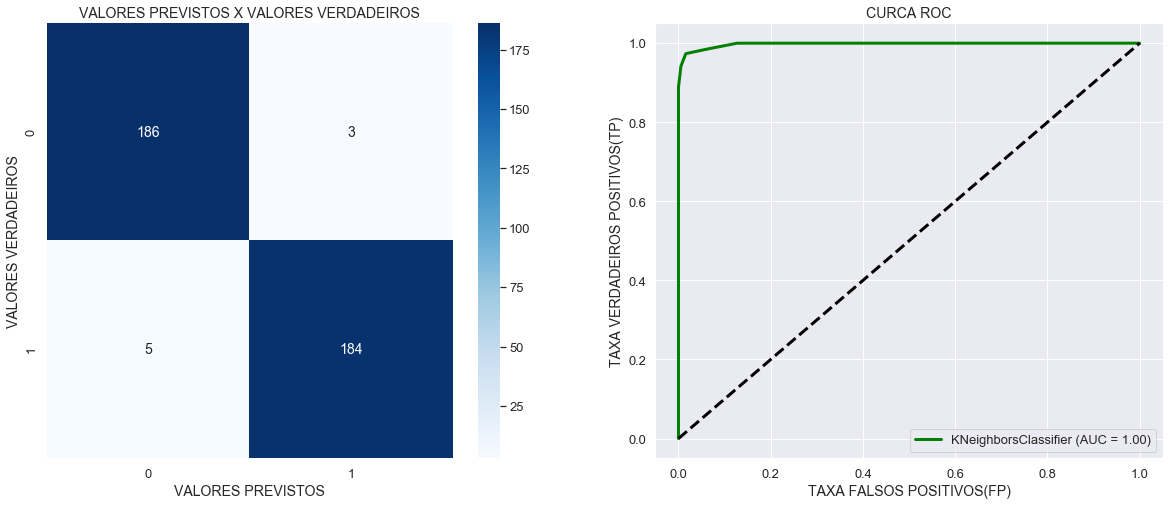

In [15]:
modelos(modelo_otimizado, X, Y, X, Y)

________________________________________________________________ACURÁCIA:  0.9806678383128296
________________________________________________________________RECALL:  0.9716981132075472
________________________________________________________________PRECISÃO:  0.976303317535545
________________________________________________________________F1:  0.9739952718676123
________________________________________________________________SELETIVIDADE:  0.9859943977591037
________________________________________________________________NPV:  0.9832402234636871


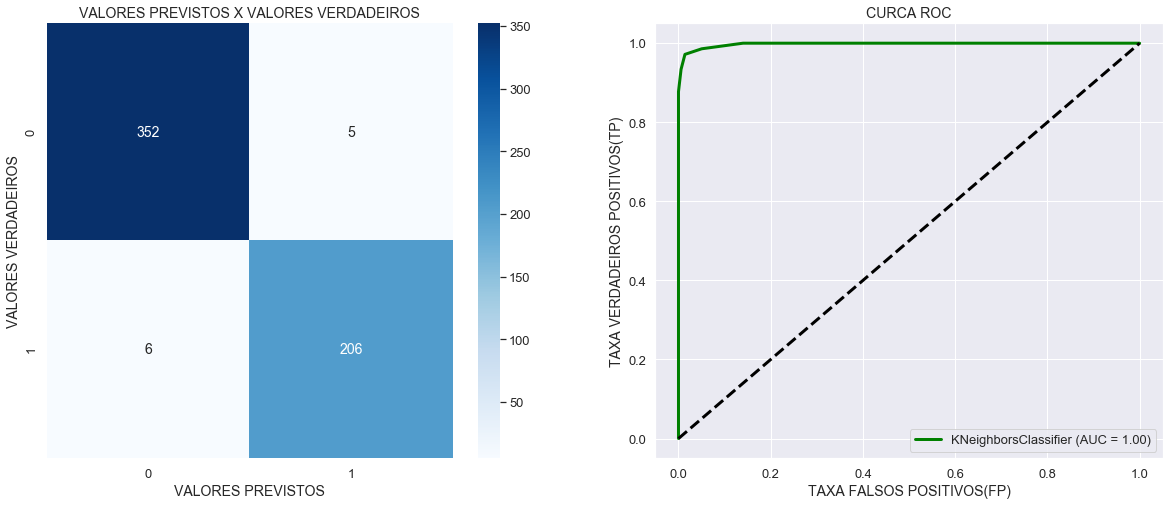

In [16]:
x0, y = previsao(r = results1, g1 = novos_dados.loc[:,novos_dados.columns != "diagnosis"], g2 = novos_dados.diagnosis)
x0 = x0.values
y = y.values

modelos(modelo_otimizado, X, Y, x0, y)